<a href="https://colab.research.google.com/github/Manuna464/Manuna464/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Task

In [46]:
import sys
# !{sys.executable} -m pip install panda


In [47]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the dataset

df = pd.read_csv('Titanic.csv')

# Display dataset info and first 5 rows

In [49]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
print("\nFirst five rows:")
df.head()



First five rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Describe the dataset and confirm if there are any missing values

In [51]:

print("\nSummary statistics:")
df.describe()
print(df.describe())


Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [52]:

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# What is the distribution of survivors and non-survivors?

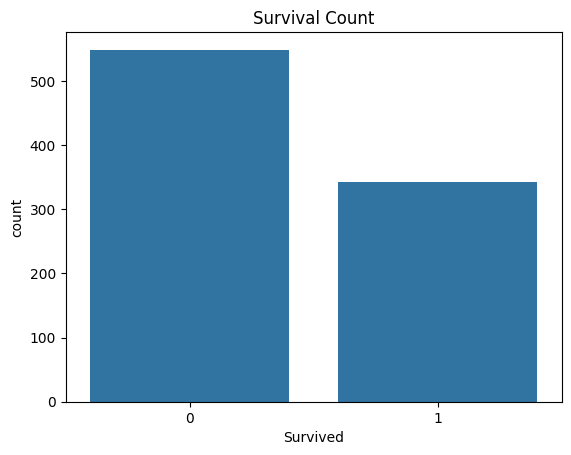

In [53]:
# Distribution of survivors and non-survivors

sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# What is the most important factor in determining survival?

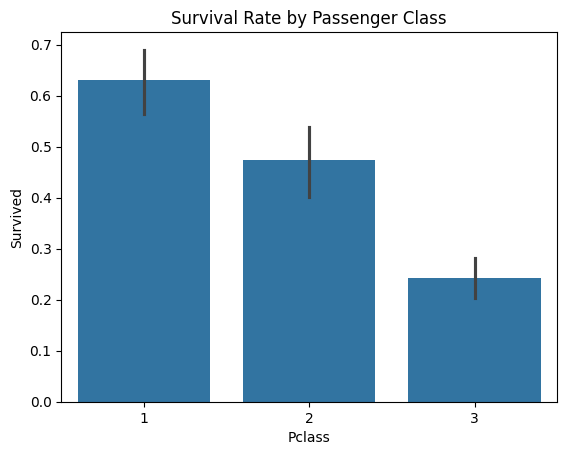

In [54]:
# Survival rate by passenger class (Pclass)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

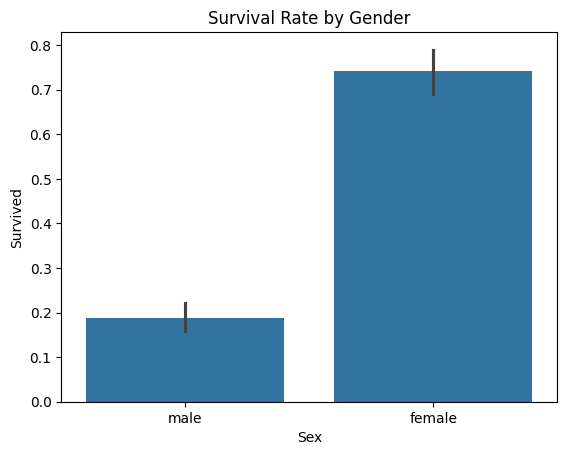

In [55]:
# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

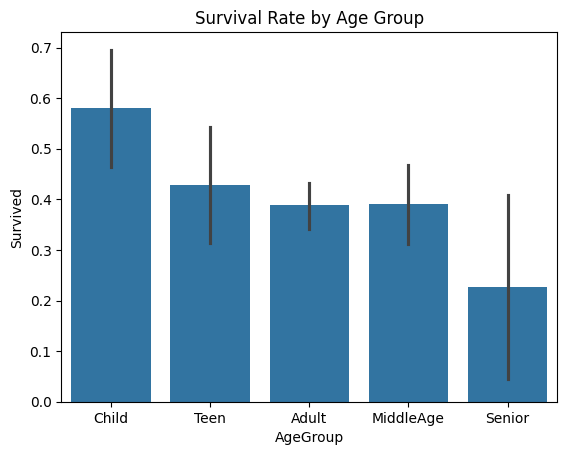

In [56]:
# Survival rate based on age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

# Was there preference for Upper-class passengers in the lifeboats?

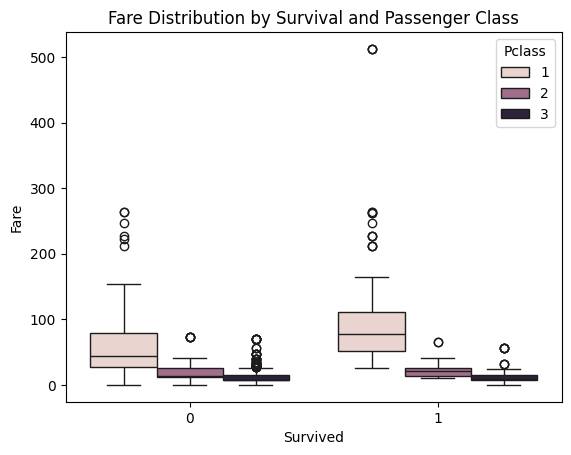

In [57]:
# Fare distribution by survival and class to approximate socio-economic status
sns.boxplot(x='Survived', y='Fare', hue='Pclass', data=df)
plt.title('Fare Distribution by Survival and Passenger Class')
plt.show()

# Were women and children first?

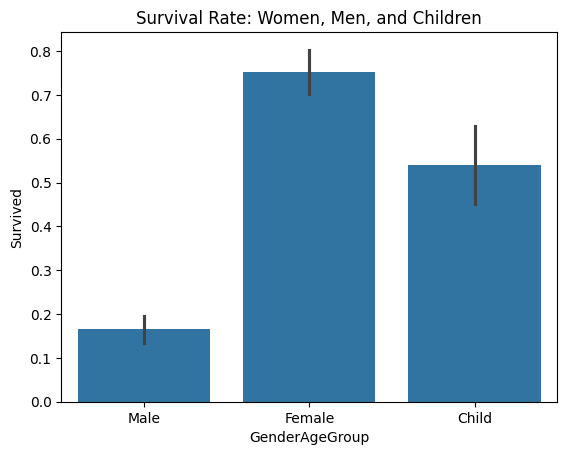

In [58]:
# Compare survival rates for women, men, and children (under 18)
def group_gender_age(row):
    if row['Age'] < 18:
        return 'Child'
    else:
        return row['Sex'].capitalize()

df['GenderAgeGroup'] = df.apply(group_gender_age, axis=1)
sns.barplot(x='GenderAgeGroup', y='Survived', data=df)
plt.title('Survival Rate: Women, Men, and Children')
plt.show()

# What is the impact of family size on survival?

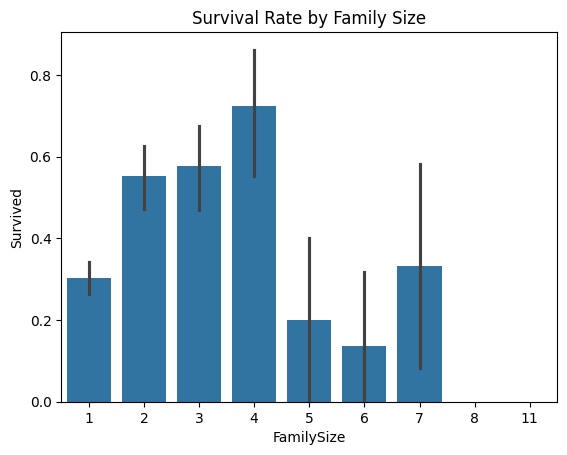

In [59]:
# Siblings and Spouses / Parents and Children aboard
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()